In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
courses = pd.read_csv("/content/drive/MyDrive/e-learning/courses.csv")
ass = pd.read_csv("/content/drive/MyDrive/e-learning/assessments.csv")
vle = pd.read_csv("/content/drive/MyDrive/e-learning/vle.csv")

In [5]:
studentvle = pd.read_csv("/content/drive/MyDrive/e-learning/studentVle.csv")
studentRegis = pd.read_csv("/content/drive/MyDrive/e-learning/studentRegistration.csv")
studentAss = pd.read_csv("/content/drive/MyDrive/e-learning/studentRegistration.csv")
studentinfo = pd.read_csv("/content/drive/MyDrive/e-learning/studentInfo.csv")

In [6]:
clickrate = pd.read_csv("/content/drive/MyDrive/clickrate_cat_ls.csv")

In [7]:
clickrate.head()

,Unnamed: 0,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls,logs_st_category,SumClick_st,SumClick_st_category,ClickRate_st_category,ClickRate_st_category_intera
0,0,AAA,2013J,28400,546652,-10,4,forumng,1,active,1,4,4,0.250000,High
1,1,AAA,2013J,28400,546652,-10,1,forumng,2,active,2,5,5,0.400000,Good
2,2,AAA,2013J,28400,546652,-10,1,forumng,3,active,3,6,6,0.500000,Good
3,3,AAA,2013J,28400,546652,-10,8,forumng,4,active,4,14,14,0.285714,Good
4,4,AAA,2013J,30268,546652,-10,3,forumng,1,active,1,3,3,0.333333,Good


In [8]:
clickrate.drop(["Unnamed: 0"], axis = 1,inplace = True)

In [9]:
#get the minimum clickrate for every learning style for every student ( the minimum = the highest interaction )
test = clickrate.groupby(['id_student','activity_cat_ls'])['ClickRate_st_category'].agg('min').reset_index()
test.head(10)
#test.describe

,id_student,activity_cat_ls,ClickRate_st_category
0,6516,active,0.060606
1,6516,global,0.444444
2,6516,reflective,0.055556
3,6516,verbal,0.300000
4,6516,visual,0.142857
5,8462,active,0.200000
6,8462,global,0.354839
7,8462,reflective,0.250000
8,8462,sensing,0.375000
9,8462,verbal,0.625000


In [10]:
test["ClickRate_st_category_intera"] = pd.cut(test["ClickRate_st_category"], [-1,0.25,0.5,0.75,1],labels = ["High","Good","Acceptable","Low"])
test.head(10)

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera
0,6516,active,0.060606,High
1,6516,global,0.444444,Good
2,6516,reflective,0.055556,High
3,6516,verbal,0.300000,Good
4,6516,visual,0.142857,High
5,8462,active,0.200000,High
6,8462,global,0.354839,Good
7,8462,reflective,0.250000,High
8,8462,sensing,0.375000,Good
9,8462,verbal,0.625000,Acceptable


In [11]:
activities_ls = {
    "active":"1",
    "reflective":"2",
    "sensing":"3",
    "verbal":"4",
    "sequential":"5",
    "global":"6",
    "visual":"7"
}

In [12]:
test["activity_cat_ls_number"] = test["activity_cat_ls"].map(lambda x: activities_ls[x])

In [13]:
test.head()

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera,activity_cat_ls_number
0,6516,active,0.060606,High,1
1,6516,global,0.444444,Good,6
2,6516,reflective,0.055556,High,2
3,6516,verbal,0.300000,Good,4
4,6516,visual,0.142857,High,7


In [14]:
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.plot3D(test["id_student"],test["activity_cat_ls_number"],test["ClickRate_st_category"])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc896d7b280> (for post_execute):


TypeError: ignored

TypeError: ignored

<Figure size 432x288 with 1 Axes>

In [15]:
km = KMeans(n_clusters=7)

In [16]:
y_predicted = km.fit_predict(test[["activity_cat_ls_number","ClickRate_st_category"]])

In [17]:
y_predicted

array([0, 1, 3, ..., 1, 3, 2], dtype=int32)

In [18]:
test['cluster']=y_predicted
 

In [19]:
test[ test.cluster == 4]

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera,activity_cat_ls_number,cluster
8,8462,sensing,0.375000,Good,3,4
25,23798,sensing,1.000000,Low,3,4
33,24213,sensing,0.235294,High,3,4
38,24391,sensing,1.000000,Low,3,4
46,25107,sensing,0.500000,Good,3,4
...,...,...,...,...,...,...
124239,2697885,sensing,0.117647,High,3,4
124246,2697921,sensing,0.500000,Good,3,4
124253,2698125,sensing,0.333333,Good,3,4
124259,2698251,sensing,0.181818,High,3,4


In [20]:
test[ test.cluster == 1]

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera,activity_cat_ls_number,cluster
1,6516,global,0.444444,Good,6,1
6,8462,global,0.354839,Good,6,1
11,11391,global,0.227273,High,6,1
15,23629,global,0.400000,Good,6,1
18,23698,global,0.600000,Acceptable,6,1
...,...,...,...,...,...,...
124257,2698251,global,0.360000,Good,6,1
124262,2698257,global,0.388889,Good,6,1
124266,2698535,global,0.500000,Good,6,1
124272,2698577,global,0.285714,Good,6,1


In [21]:
test[ test.cluster == 5]

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera,activity_cat_ls_number,cluster
4,6516,visual,0.142857,High,7,5
21,23698,visual,1.000000,Low,7,5
71,26192,visual,0.333333,Good,7,5
78,26211,visual,0.333333,Good,7,5
84,26247,visual,0.500000,Good,7,5
...,...,...,...,...,...,...
124229,2697630,visual,1.000000,Low,7,5
124235,2697773,visual,0.200000,High,7,5
124242,2697885,visual,0.550000,Acceptable,7,5
124249,2697921,visual,0.500000,Good,7,5


In [22]:
age_feature = pd.merge(left=test, right=studentinfo, left_on="id_student", 
                             right_on="id_student")

In [23]:
age_feature.head()

,id_student,activity_cat_ls,ClickRate_st_category,ClickRate_st_category_intera,activity_cat_ls_number,cluster,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,6516,active,0.060606,High,1,0,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
1,6516,global,0.444444,Good,6,1,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
2,6516,reflective,0.055556,High,2,3,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
3,6516,verbal,0.300000,Good,4,2,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
4,6516,visual,0.142857,High,7,5,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass


In [24]:
age_feature = age_feature [["id_student","age_band","activity_cat_ls","ClickRate_st_category","activity_cat_ls_number","ClickRate_st_category_intera","highest_education"]]

In [25]:
more_features = age_feature

In [26]:
more_features.head(10)

,id_student,age_band,activity_cat_ls,ClickRate_st_category,activity_cat_ls_number,ClickRate_st_category_intera,highest_education
0,6516,55<=,active,0.060606,1,High,HE Qualification
1,6516,55<=,global,0.444444,6,Good,HE Qualification
2,6516,55<=,reflective,0.055556,2,High,HE Qualification
3,6516,55<=,verbal,0.300000,4,Good,HE Qualification
4,6516,55<=,visual,0.142857,7,High,HE Qualification
5,8462,55<=,active,0.200000,1,High,HE Qualification
6,8462,55<=,active,0.200000,1,High,HE Qualification
7,8462,55<=,global,0.354839,6,Good,HE Qualification
8,8462,55<=,global,0.354839,6,Good,HE Qualification
9,8462,55<=,reflective,0.250000,2,High,HE Qualification


In [27]:
print(more_features["age_band"].unique())

['55<=' '0-35' '35-55']


In [28]:
age = {
    "55<=":"1",
    "0-35":"2",
    "35-55":"3"
}

In [29]:
more_features["age"] = more_features["age_band"].map(lambda x: age[x])

<ipython-input-29-433225429f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_features["age"] = more_features["age_band"].map(lambda x: age[x])


In [30]:
print(more_features["age_band"].unique())

['55<=' '0-35' '35-55']


In [31]:
print(more_features["highest_education"].unique())

['HE Qualification' 'Lower Than A Level' 'A Level or Equivalent'
 'Post Graduate Qualification' 'No Formal quals']


In [32]:
education = {
    "HE Qualification":"1",
    "Lower Than A Level":"2",
    "A Level or Equivalent":"3",
    "Post Graduate Qualification":"4",
    "No Formal quals":"5"
}

In [33]:
more_features["education"] = more_features["highest_education"].map(lambda x: education[x])

In [34]:
km = KMeans(n_clusters=5)

In [61]:
y_predicted = km.fit_predict(more_features[["activity_cat_ls_number","ClickRate_st_category","education","age"]])

In [62]:
y_predicted

array([4, 1, 4, ..., 1, 4, 2], dtype=int32)

In [37]:
more_features['cluster']=y_predicted

In [38]:
more_features[more_features["cluster"]==2]

,id_student,age_band,activity_cat_ls,ClickRate_st_category,activity_cat_ls_number,ClickRate_st_category_intera,highest_education,age,education,cluster
25,23698,0-35,verbal,1.000000,4,Low,A Level or Equivalent,2,3,2
30,23798,0-35,sensing,1.000000,3,Low,A Level or Equivalent,2,3,2
31,23798,0-35,verbal,0.500000,4,Good,A Level or Equivalent,2,3,2
41,24213,0-35,sensing,0.235294,3,High,A Level or Equivalent,2,3,2
42,24213,0-35,sensing,0.235294,3,High,A Level or Equivalent,2,3,2
...,...,...,...,...,...,...,...,...,...,...
143833,2695608,55<=,verbal,0.428571,4,Good,A Level or Equivalent,1,3,2
143856,2697773,0-35,sensing,0.500000,3,Good,A Level or Equivalent,2,3,2
143857,2697773,0-35,verbal,0.900000,4,Low,A Level or Equivalent,2,3,2
143896,2698251,0-35,sensing,0.181818,3,High,A Level or Equivalent,2,3,2


In [39]:
more_features[more_features["cluster"]==4]

,id_student,age_band,activity_cat_ls,ClickRate_st_category,activity_cat_ls_number,ClickRate_st_category_intera,highest_education,age,education,cluster
3,6516,55<=,verbal,0.300000,4,Good,HE Qualification,1,1,4
11,8462,55<=,sensing,0.375000,3,Good,HE Qualification,1,1,4
12,8462,55<=,sensing,0.375000,3,Good,HE Qualification,1,1,4
13,8462,55<=,verbal,0.625000,4,Acceptable,HE Qualification,1,1,4
14,8462,55<=,verbal,0.625000,4,Acceptable,HE Qualification,1,1,4
...,...,...,...,...,...,...,...,...,...,...
143909,2698535,0-35,sensing,0.077586,3,High,Lower Than A Level,2,2,4
143912,2698535,0-35,verbal,0.433962,4,Good,Lower Than A Level,2,2,4
143913,2698535,0-35,verbal,0.433962,4,Good,Lower Than A Level,2,2,4
143917,2698577,35-55,verbal,1.000000,4,Low,Lower Than A Level,3,2,4


In [40]:
#get the minimum clickrate for every learning style for every student ( the minimum = the highest interaction )
#test = clickrate.groupby('id_student')[('ClickRate_st_category') , ("activity_cat_ls" == "active")].agg('min').reset_index()
kmeans_table = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "active" ]['ClickRate_st_category'].agg('min')).reset_index()
#test.describe

In [41]:
kmeans_table1 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "reflective" ]['ClickRate_st_category'].agg('min')).reset_index()
kmeans_table2 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "global" ]['ClickRate_st_category'].agg('min')).reset_index()
kmeans_table3 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "sensing" ]['ClickRate_st_category'].agg('min')).reset_index()
kmeans_table4 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "verbal" ]['ClickRate_st_category'].agg('min')).reset_index()
kmeans_table5 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "visual" ]['ClickRate_st_category'].agg('min')).reset_index()
kmeans_table6 = clickrate.groupby('id_student').apply(lambda x: x[x["activity_cat_ls"] == "sequential" ]['ClickRate_st_category'].agg('min')).reset_index()

In [42]:
kmeans_table1.rename(columns = {0:'clickrate_reflective'}, inplace = True)
kmeans_table2.rename(columns = {0:'clickrate_global'}, inplace = True)
kmeans_table3.rename(columns = {0:'clickrate_sensing'}, inplace = True)
kmeans_table4.rename(columns = {0:'clickrate_verbal'}, inplace = True)
kmeans_table5.rename(columns = {0:'clickrate_visual'}, inplace = True)
kmeans_table6.rename(columns = {0:'clickrate_sequential'}, inplace = True)

In [43]:
kmeans_test=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(kmeans_table,kmeans_table1,on='id_student'),kmeans_table2,on='id_student'),kmeans_table3,on='id_student'),kmeans_table4,on='id_student'),kmeans_table4,on='id_student'),kmeans_table5,on='id_student'),kmeans_table6,on='id_student')

In [44]:
kmeans_test=kmeans_test.fillna('1')

In [45]:
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  kmeans_test.to_csv(f)

In [46]:
demographic_ls_features = pd.merge(left=kmeans_test, right=studentinfo, left_on="id_student", 
                             right_on="id_student")

In [47]:
demographic_ls_features.drop(["code_module","code_presentation", "gender", "region", "imd_band",	"num_of_prev_attempts",	"studied_credits",	"disability",	"final_result"], axis=1 ,inplace= True)

In [48]:
demographic_ls_features["education"] = demographic_ls_features["highest_education"].map(lambda x: education[x])

In [49]:
demographic_ls_features["age"] = demographic_ls_features["age_band"].map(lambda x: age[x])

In [50]:
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  demographic_ls_features.to_csv(f)

In [51]:
demographic_ls_features.head(10)

,id_student,0,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal_x,clickrate_verbal_y,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age
0,6516,0.060606,0.055556,0.444444,1,0.3,0.3,0.142857,1,HE Qualification,55<=,1,1
1,8462,0.2,0.25,0.354839,0.375,0.625,0.625,1,1,HE Qualification,55<=,1,1
2,8462,0.2,0.25,0.354839,0.375,0.625,0.625,1,1,HE Qualification,55<=,1,1
3,11391,0.24,0.028169,0.227273,1,0.8,0.8,1,1,HE Qualification,55<=,1,1
4,23629,0.1,0.4375,0.4,1,1,1,1,1,Lower Than A Level,0-35,2,2
5,23698,0.5,0.109375,0.6,1,1.0,1.0,1.0,1,A Level or Equivalent,0-35,3,2
6,23798,0.428571,0.407186,0.666667,1.0,0.5,0.5,1,1,A Level or Equivalent,0-35,3,2
7,24186,0.285714,0.420168,1.0,1,1,1,1,1,Lower Than A Level,0-35,2,2
8,24213,0.076923,0.16,0.517857,0.235294,0.913043,0.913043,1,1,A Level or Equivalent,0-35,3,2
9,24213,0.076923,0.16,0.517857,0.235294,0.913043,0.913043,1,1,A Level or Equivalent,0-35,3,2


In [52]:
kmeans_test.head(100)

,id_student,0,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal_x,clickrate_verbal_y,clickrate_visual,clickrate_sequential
0,6516,0.060606,0.055556,0.444444,1,0.3,0.3,0.142857,1
1,8462,0.2,0.25,0.354839,0.375,0.625,0.625,1,1
2,11391,0.24,0.028169,0.227273,1,0.8,0.8,1,1
3,23629,0.1,0.4375,0.4,1,1,1,1,1
4,23698,0.5,0.109375,0.6,1,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
95,35747,0.090909,0.051282,0.465517,0.4,0.307692,0.307692,1,1
96,35796,0.2,0.070588,0.461538,1,1.0,1.0,0.5,1
97,35812,0.8,1,1.0,1,0.333333,0.333333,1,1
98,35860,0.2,0.113924,0.5,0.285714,0.727273,0.727273,0.535714,0.333333


In [53]:
kmeans_table1.head(10)

,id_student,clickrate_reflective
0,6516,0.055556
1,8462,0.250000
2,11391,0.028169
3,23629,0.437500
4,23698,0.109375
5,23798,0.407186
6,24186,0.420168
7,24213,0.160000
8,24391,0.210280
9,24734,0.333333


In [54]:
kmeans_table.head(10)

,id_student,0
0,6516,0.060606
1,8462,0.200000
2,11391,0.240000
3,23629,0.100000
4,23698,0.500000
5,23798,0.428571
6,24186,0.285714
7,24213,0.076923
8,24391,0.100000
9,24734,0.250000


In [55]:
kmeans_table.describe

<bound method NDFrame.describe of        id_student         0
0            6516  0.060606
1            8462  0.200000
2           11391  0.240000
3           23629  0.100000
4           23698  0.500000
...           ...       ...
25856     2698251  0.228571
25857     2698257  0.325203
25858     2698535  0.025424
25859     2698577  0.188119
25860     2698588  0.291667

[25861 rows x 2 columns]>

In [56]:
kmeans_table.rename(columns = {0:'clickrate_active'}, inplace = True)

In [57]:
more_features[more_features["activity_cat_ls"]== "active"]

,id_student,age_band,activity_cat_ls,ClickRate_st_category,activity_cat_ls_number,ClickRate_st_category_intera,highest_education,age,education,cluster
0,6516,55<=,active,0.060606,1,High,HE Qualification,1,1,0
5,8462,55<=,active,0.200000,1,High,HE Qualification,1,1,0
6,8462,55<=,active,0.200000,1,High,HE Qualification,1,1,0
15,11391,55<=,active,0.240000,1,High,HE Qualification,1,1,0
19,23629,0-35,active,0.100000,1,High,Lower Than A Level,2,2,0
...,...,...,...,...,...,...,...,...,...,...
143898,2698257,0-35,active,0.325203,1,Good,Lower Than A Level,2,2,0
143902,2698535,0-35,active,0.025424,1,High,Lower Than A Level,2,2,0
143903,2698535,0-35,active,0.025424,1,High,Lower Than A Level,2,2,0
143914,2698577,35-55,active,0.188119,1,High,Lower Than A Level,3,2,0


##Elbow function

In [58]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(more_features[["id_student","activity_cat_ls_number","ClickRate_st_category","education","age"]])
    sse.append(km.inertia_)

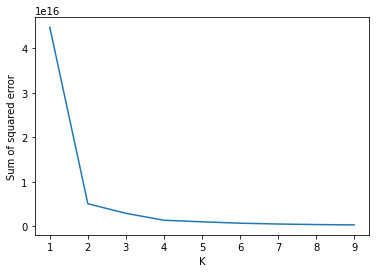

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [60]:
more_features

,id_student,age_band,activity_cat_ls,ClickRate_st_category,activity_cat_ls_number,ClickRate_st_category_intera,highest_education,age,education,cluster
0,6516,55<=,active,0.060606,1,High,HE Qualification,1,1,0
1,6516,55<=,global,0.444444,6,Good,HE Qualification,1,1,1
2,6516,55<=,reflective,0.055556,2,High,HE Qualification,1,1,0
3,6516,55<=,verbal,0.300000,4,Good,HE Qualification,1,1,4
4,6516,55<=,visual,0.142857,7,High,HE Qualification,1,1,1
...,...,...,...,...,...,...,...,...,...,...
143917,2698577,35-55,verbal,1.000000,4,Low,Lower Than A Level,3,2,4
143918,2698588,0-35,active,0.291667,1,Good,HE Qualification,2,1,0
143919,2698588,0-35,global,0.400000,6,Good,HE Qualification,2,1,1
143920,2698588,0-35,reflective,0.375940,2,Good,HE Qualification,2,1,0
